In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")


In [ ]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

# A list with the all the different titles
titles = sorted(set([x for x in df.Name.map(lambda x: get_title(x))]))


# Normalize the titles
def replace_titles(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Major']:
        return 'Officer'
    elif title in ["Jonkheer","Don",'the Countess', 'Dona', 'Lady',"Sir"]:
        return 'Royalty'
    elif title in ['the Countess', 'Mme', 'Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    else:
        return title

# Lets create a new column for the titles
df['Title'] = df['Name'].map(lambda x: get_title(x))
# train.Title.value_counts()
# train.Title.value_counts().plot(kind='bar')

# And replace the titles, so the are normalized to 'Mr', 'Miss' and 'Mrs'
df['Title'] = df.apply(replace_titles, axis=1)


df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna("S", inplace=True)
df.drop("Cabin", axis=1, inplace=True)
df.drop("Ticket", axis=1, inplace=True)
df.drop("Name", axis=1, inplace=True)
df.Sex.replace(('male','female'), (0,1), inplace = True)
df.Embarked.replace(('S','C','Q'), (0,1,2), inplace = True)
df.Title.replace(('Mr','Miss','Mrs','Master','Dr','Rev','Officer','Royalty'), (0,1,2,3,4,5,6,7), inplace = True)

In [ ]:
df.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
815,816,0,1,0,28.0,0,0,0.0000,0,0
616,617,0,3,0,34.0,1,1,14.4000,0,0
541,542,0,3,1,9.0,4,2,31.2750,0,1
353,354,0,3,0,25.0,1,0,17.8000,0,0
9,10,1,2,1,14.0,1,0,30.0708,1,2


In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(["Survived", "PassengerId"], axis = 1)
y = df["Survived"]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.22, random_state = 0)


In [ ]:
# import pickle
# from sklearn.ensemble import RandomForestClassifier
# from sklearn. metrics import accuracy_score

# #fit the modl on training set using random Forest algorithm
# randomforest = RandomForestClassifier()
# randomforest.fit(x_train, y_train)
# y_pred = randomforest.predict(x_val)
# acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)

# print(acc_randomforest)

# #save to model to disk
# filename = "titnaic_model.sav"
# pickle.dump(randomforest, open(filename, "wb"))


84.26


Epoch 1/100
14/14 [==============================] - 2s 38ms/step - loss: 0.6922 - accuracy: 0.6138 - val_loss: 0.6905 - val_accuracy: 0.6345
Epoch 2/100
14/14 [==============================] - 0s 16ms/step - loss: 0.6876 - accuracy: 0.6124 - val_loss: 0.6754 - val_accuracy: 0.6396
Epoch 3/100
14/14 [==============================] - 0s 12ms/step - loss: 0.6622 - accuracy: 0.6167 - val_loss: 0.6110 - val_accuracy: 0.6904
Epoch 4/100
14/14 [==============================] - 0s 15ms/step - loss: 0.6231 - accuracy: 0.6787 - val_loss: 0.5642 - val_accuracy: 0.7360
Epoch 5/100
14/14 [==============================] - 0s 11ms/step - loss: 0.6206 - accuracy: 0.6729 - val_loss: 0.5501 - val_accuracy: 0.7259
Epoch 6/100
14/14 [==============================] - 0s 11ms/step - loss: 0.6077 - accuracy: 0.6801 - val_loss: 0.5519 - val_accuracy: 0.7056
Epoch 7/100
14/14 [==============================] - 0s 11ms/step - loss: 0.6080 - accuracy: 0.6816 - val_loss: 0.5349 - val_accuracy: 0.7310
Epoch 

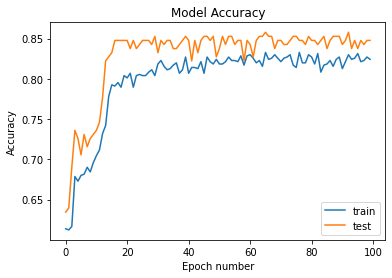

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout  #Dropout is used to avoid the overfitting and Desne is fully connected layer
import matplotlib.pyplot as plt

model = Sequential()
model.add(Dense(32, activation = "relu", input_shape=(8,), kernel_initializer = "uniform"))
model.add(Dropout(rate = 0.2))
model.add(Dense(64, activation = "relu" , kernel_initializer = "uniform" ))
model.add(Dropout(rate = 0.2))
model.add(Dense(128, activation = "relu" , kernel_initializer = "uniform"))
model.add(Dropout(rate = 0.2))
model.add(Dense(64, activation = "relu" , kernel_initializer = "uniform"))
model.add(Dropout(rate = 0.2))
model.add(Dense(32, activation = "relu" , kernel_initializer = "uniform"))
model.add(Dense(1, activation = "sigmoid", kernel_initializer = "uniform"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
model_train = model.fit(x,y, epochs = 100, batch_size = 50, verbose = 1, validation_split = 0.22)

plt.plot(model_train.history["accuracy"], label = "train")
plt.plot(model_train.history["val_accuracy"], label = "test")
plt.title("Model Accuracy")
plt.xlabel("Epoch number")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.show()

model.save("titanic_NN.h5")


In [ ]:
df_test = pd.read_csv('test.csv')
df_test['Title'] = df_test['Name'].map(lambda x : get_title(x))

df_test["Title"] = df_test.apply(replace_titles, axis = 1)
ids = df_test["PassengerId"]

df_test['Age'].fillna(df['Age'].median(), inplace=True)
df_test['Fare'].fillna(df['Fare'].median(), inplace=True)
df_test['Embarked'].fillna("S", inplace=True)
df_test.drop("Cabin", axis=1, inplace=True)
df_test.drop("Ticket", axis=1, inplace=True)
df_test.drop("Name", axis=1, inplace=True)
df_test.drop("PassengerId", axis=1, inplace=True)

df_test.Sex.replace(('male','female'), (0,1), inplace = True)
df_test.Embarked.replace(('S','C','Q'), (0,1,2), inplace = True)
df_test.Title.replace(('Mr','Miss','Mrs','Master','Dr','Rev','Officer','Royalty'), (0,1,2,3,4,5,6,7), inplace = True)

In [ ]:
df_test.sample(20)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
214,3,1,38.0,4,2,7.7750,0,1
353,2,0,49.0,1,2,65.0000,0,0
416,3,0,28.0,0,0,8.0500,0,0
142,1,0,61.0,1,3,262.3750,1,0
17,3,0,21.0,0,0,7.2250,1,0
290,1,0,28.0,0,0,39.6000,0,0
330,2,1,48.0,0,2,36.7500,0,2
38,3,0,25.0,0,0,9.5000,0,0
220,2,1,30.0,1,0,13.8583,1,1
356,1,1,59.0,2,0,51.4792,0,2


In [ ]:
import numpy as np
from keras.models import load_model
model_predict = load_model('titanic_NN.h5')

prediction = model_predict.predict(df_test)
predi = prediction.round().astype('int64')
prediction_1d = predi.flatten()
output = pd.DataFrame({"PassengerId":ids, "Survived": prediction_1d})
output.to_csv('submision.csv', index = False)
